In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton

In [2]:
def bisection_method(f, a, b, tol=1e-7, max_iter=100):
    errors = []
    fa = f(a)
    fb = f(b)
    
    if fa * fb > 0:
        raise ValueError("The function must have different signs at the endpoints a and b.")
    
    for iteration in range(max_iter):
        c = (a + b) / 2
        fc = f(c)
        error = abs(fc)
        errors.append(error)
        
        if fc == 0 or (b - a) / 2 < tol:
            return c, errors
        
        if fa * fc < 0:
            b = c
        else:
            a = c
            fa = fc
    
    return (a + b) / 2, errors


In [3]:
def newton_raphson_method(f, df, x0, tol=1e-7, max_iter=100):
    errors = []
    
    x = x0
    for iteration in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        if abs(dfx) < tol:
            raise ValueError("Derivative is too small; no convergence.")
        
        error = abs(fx)
        errors.append(error)
        
        if error < tol:
            return x, errors
        
        x = x - fx / dfx
    
    return x, errors


In [4]:
def f1(x):
    return x**2 - 2.0

def df1(x):
    return 2 * x

# Bisection method
root_bisection, errors_bisection = bisection_method(f1, 0, 2)
print("Bisection method root for x^2 = 2:", root_bisection)

# Newton-Raphson method
root_newton, errors_newton = newton_raphson_method(f1, df1, 1.0)
print("Newton-Raphson method root for x^2 = 2:", root_newton)


Bisection method root for x^2 = 2: 1.4142135977745056
Newton-Raphson method root for x^2 = 2: 1.4142135623746899


In [5]:
import numpy as np

def kepler(M, e):
    def f2(E):
        return E - e * np.sin(E) - M

    def df2(E):
        return 1 - e * np.cos(E)
    
    

    # Bisection method
    root_bisection, errors_bisection = bisection_method(f2, 0, 2 * np.pi)
    print(f"Bisection method root for M={M}, e={e}:", root_bisection)

    # Newton-Raphson method
    root_newton, errors_newton = newton_raphson_method(f2, df2, M)
    print(f"Newton-Raphson method root for M={M}, e={e}:", root_newton)

    return errors_bisection, errors_newton


Bisection method root for M=1.5, e=0.5: 1.9621892216056938
Newton-Raphson method root for M=1.5, e=0.5: 1.9621893490054094


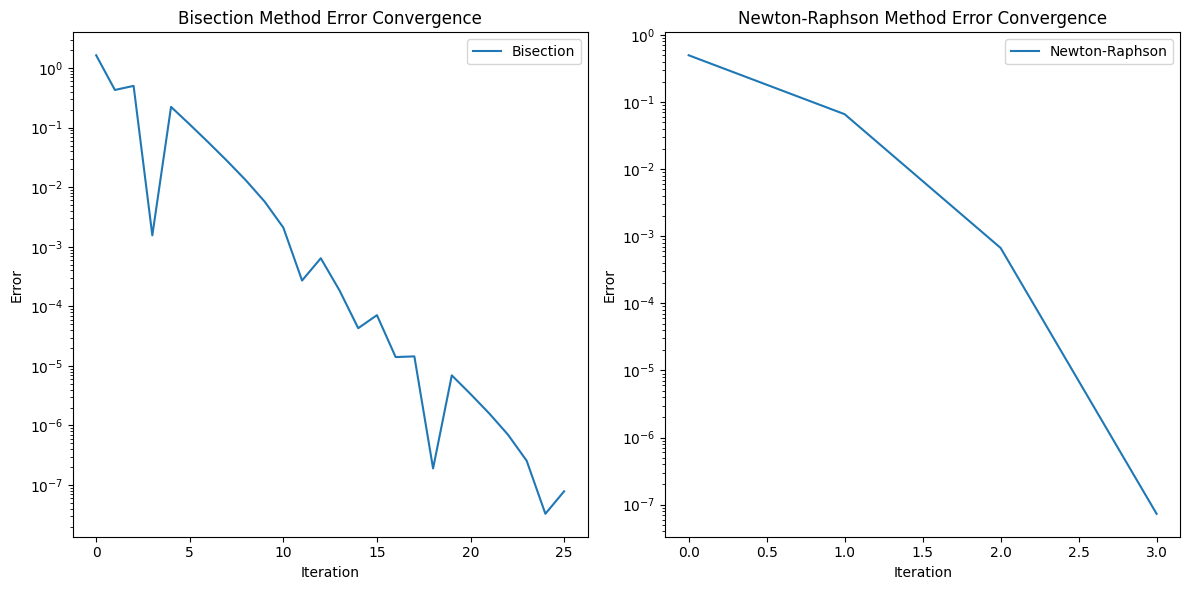

Bisection method root for M=1.5, e=0.9: 2.217997183548383
Newton-Raphson method root for M=1.5, e=0.9: 2.2179972027545016


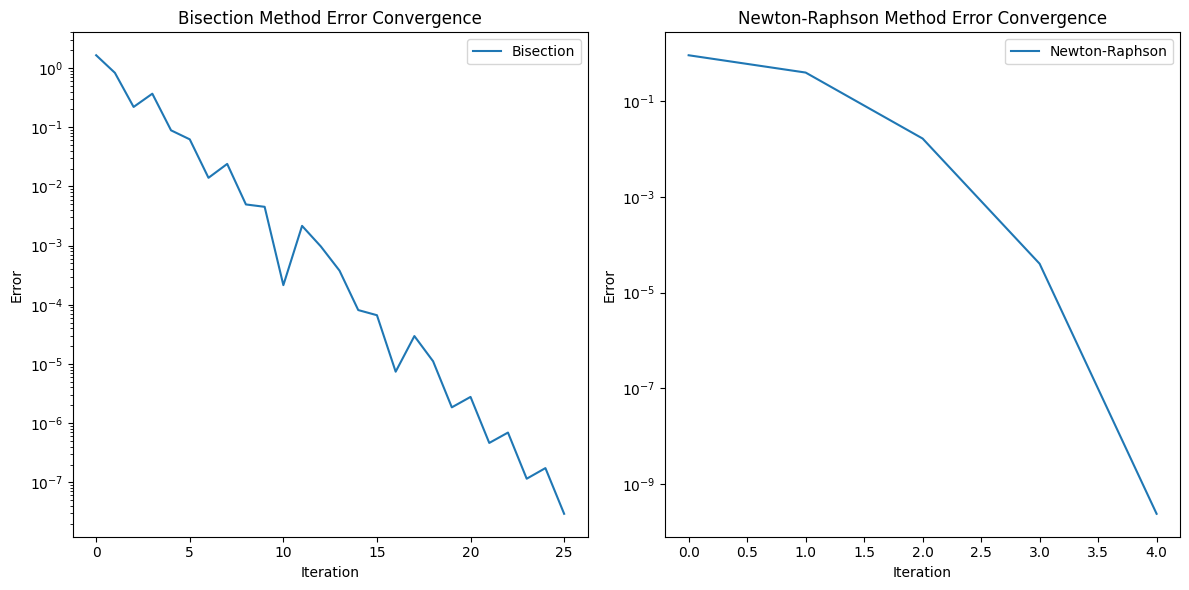

In [6]:
import matplotlib.pyplot as plt

def plot_errors(errors_bisection, errors_newton):
    plt.figure(figsize=(12, 6))
    
    # Bisection method errors
    plt.subplot(1, 2, 1)
    plt.plot(errors_bisection, label='Bisection')
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Bisection Method Error Convergence')
    plt.legend()

    # Newton-Raphson method errors
    plt.subplot(1, 2, 2)
    plt.plot(errors_newton, label='Newton-Raphson')
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Newton-Raphson Method Error Convergence')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Test Kepler's equation with M = 1.5, e = 0.5
errors_bisection, errors_newton = kepler(1.5, 0.5)
plot_errors(errors_bisection, errors_newton)

# Test Kepler's equation with M = 1.5, e = 0.9
errors_bisection, errors_newton = kepler(1.5, 0.9)
plot_errors(errors_bisection, errors_newton)


In [9]:
import time as time

In [10]:
M_values = np.linspace(0, 2 * np.pi, 10000)
e = 0.9


In [12]:
# Kepler's equation functions
def kepler_f(M, e):
    return lambda E: E - e * np.sin(E) - M

def kepler_df(e):
    return lambda E: 1 - e * np.cos(E) 

def measure_performance(M_values, e):
    bisection_times = []
    newton_times = []
    results_bisection = []
    results_newton = []

    for M in M_values:
        # Bisection method
        start_time = time.time()
        E_bisection, _ = bisection_method(kepler_f(M, e), 0, 2 * np.pi)
        end_time = time.time()
        bisection_times.append(end_time - start_time)
        results_bisection.append(E_bisection)

        # Newton-Raphson method
        start_time = time.time()
        E_newton, _ = newton_raphson_method(kepler_f(M, e), kepler_df(e), M)
        end_time = time.time()
        newton_times.append(end_time - start_time)
        results_newton.append(E_newton)

    return np.array(bisection_times), np.array(newton_times), results_bisection, results_newton

bisection_times, newton_times, results_bisection, results_newton = measure_performance(M_values, e)


Total time for Bisection method: 0.948674 seconds
Total time for Newton-Raphson method: 0.341498 seconds


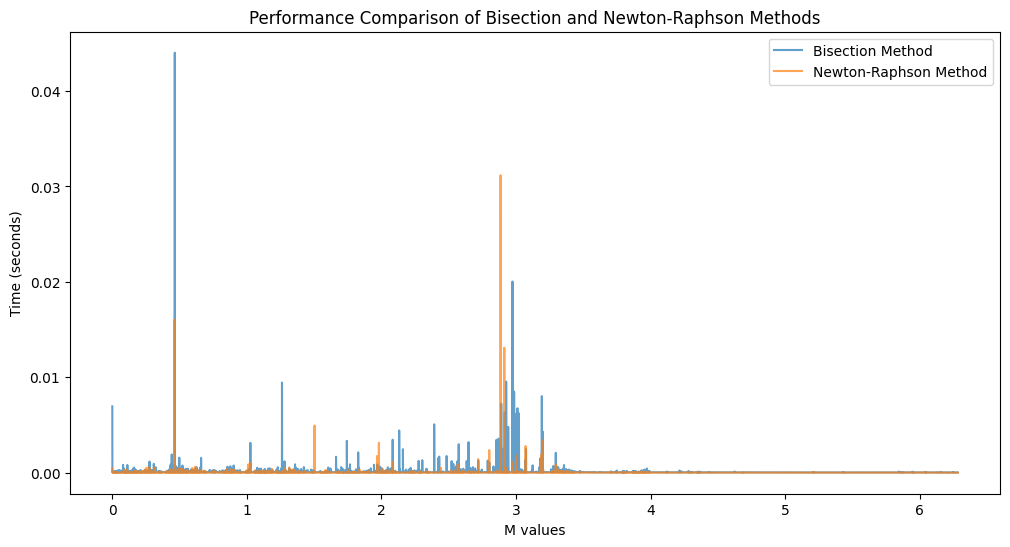

In [13]:
# Calculate total time for each method
total_bisection_time = np.sum(bisection_times)
total_newton_time = np.sum(newton_times)

print(f"Total time for Bisection method: {total_bisection_time:.6f} seconds")
print(f"Total time for Newton-Raphson method: {total_newton_time:.6f} seconds")

# Plot the performance comparison
plt.figure(figsize=(12, 6))
plt.plot(M_values, bisection_times, label='Bisection Method', alpha=0.7)
plt.plot(M_values, newton_times, label='Newton-Raphson Method', alpha=0.7)
plt.xlabel('M values')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison of Bisection and Newton-Raphson Methods')
plt.legend()
plt.show()
